<a href="https://colab.research.google.com/github/tnotstar/machine-learning-zoomcamp/blob/master/cohorts/2025/06-trees/submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Zoomcamp (Cohort 2025) #

## Chapter 06. Decision Trees and Ensemble Learning ##

### Homework (Submitted at 2025-11-04) ###

#### Initialization and loading libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Retrieving Dataset

> Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution. If it's exactly in between two options, select the higher value.

In this homework, we continue using the fuel efficiency dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv).

You can do it with wget:

In [2]:
!wget -N 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

--2025-11-03 22:15:58--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.05s   

Last-modified header missing -- time-stamps turned off.
2025-11-03 22:15:58 (17.7 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [3]:
df = pd.read_csv("car_fuel_efficiency.csv")

In [4]:
df.describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9202.000000,9704.000000
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,1.000000,16.707965
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000,25.967222


The goal of this homework is to create a regression model for predicting the car fuel efficiency (column **'fuel_efficiency_mpg'**).

#### Preparing the dataset

* Fill missing values with zeros.
* Do train/validation/test split with 60%/20%/20% distribution.
* Use the train_test_split function and set the random_state parameter to 1.
* Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [5]:
df.isnull().sum()

,0
engine_displacement,0
num_cylinders,482
horsepower,708
vehicle_weight,0
acceleration,930
model_year,0
origin,0
fuel_type,0
drivetrain,0
num_doors,502


* Fill missing values with zeros.
  - For numeric features, we will replace with with 0.0
  - There isn't any categorical feature with NaN values.

In [6]:
df = df.fillna(0)
df.isnull().sum()

,0
engine_displacement,0
num_cylinders,0
horsepower,0
vehicle_weight,0
acceleration,0
model_year,0
origin,0
fuel_type,0
drivetrain,0
num_doors,0


In [7]:
target_variable = "fuel_efficiency_mpg"
print(f"Target variable: '{target_variable}'")

categorical_features = df.select_dtypes(include='object').columns
if target_variable in categorical_features:
  categorical_features = categorical_features.drop(target_variable)
print(f"Categorical features: {sorted(categorical_features.tolist())}")

numerical_features = df.select_dtypes(include=np.number).columns
if target_variable in numerical_features:
  numerical_features = numerical_features.drop(target_variable)
print(f"Numerical features: {sorted(numerical_features.tolist())}")

feature_display_names = {
    "acceleration": "Acceleration",
    "drivetrain": "Drivetrain",
    "engine_displacement": "Engine Displacement",
    "horsepower": "Horsepower",
    "model_year": "Model Year",
    "num_cylinders": "Number of Cylinders",
    "num_doors": "Number of Doors",
    "fuel_type": "Fuel Type",
    "origin": "Origin",
    "vehicle_weight": "Vehicle Weight",
}

Target variable: 'fuel_efficiency_mpg'
Categorical features: ['drivetrain', 'fuel_type', 'origin']
Numerical features: ['acceleration', 'engine_displacement', 'horsepower', 'model_year', 'num_cylinders', 'num_doors', 'vehicle_weight']


In [8]:
df.describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.000000,9704.000000,9704.000000,9704.000000,9704.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,3.765664,138.738355,3001.280993,13.582275,2011.484027,-0.006080,14.985243
std,49.455319,2.130715,48.401189,497.894860,5.025294,6.659808,1.020689,2.556468
min,10.000000,0.000000,0.000000,952.681761,0.000000,2000.000000,-4.000000,6.200971
25%,170.000000,2.000000,124.000000,2666.248985,12.600000,2006.000000,-1.000000,13.267459
50%,200.000000,4.000000,146.000000,2993.226296,14.700000,2012.000000,0.000000,15.006037
75%,230.000000,5.000000,168.000000,3334.957039,16.500000,2017.000000,1.000000,16.707965
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000,25.967222


* Do train/validation/test split with 60%/20%/20% distribution.
  - Use train_test_split function for that with random_state=$1$




In [9]:
common_random_state = 1

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=common_random_state)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=common_random_state)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

print(f"Length of the train dataset: {len(df_train)}")
print(f"Length of the validation dataset: {len(df_val)}")
print(f"Length of the test dataset: {len(df_test)}")

def split_y_X(df, y_name):
  y = df[y_name]
  X = df.drop(columns=[y_name])
  return y, X

common_y_name = target_variable

y_full_train, X_full_train = split_y_X(df_full_train, common_y_name)
y_train, Xtmp_train = split_y_X(df_train, common_y_name)
y_val, Xtmp_val = split_y_X(df_val, common_y_name)
y_test, Xtmp_test = split_y_X(df_test, common_y_name)

Length of the train dataset: 5822
Length of the validation dataset: 1941
Length of the test dataset: 1941


* Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [10]:
dv = DictVectorizer(sparse=False)

train_dict = Xtmp_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = Xtmp_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

print(f"Training features: {X_train.shape}")
print(f"Validation features: {X_val.shape}")

Training features: (5822, 14)
Validation features: (1941, 14)


#### Question 1: Most important featute

Let's train a decision tree regressor to predict the `fuel_efficiency_mpg` variable.

Train a model with `max_depth = 1`.
Which feature is used for splitting the data?

* 'vehicle_weight'
* 'model_year'
* 'origin'
* 'fuel_type'

ROC AUC could also be used to evaluate feature importance of numerical variables.

In [11]:
dt = DecisionTreeRegressor(max_depth=1, random_state=common_random_state)
dt.fit(X_train, y_train)

feature_index = dt.tree_.feature[0]
feature_name = dv.feature_names_[feature_index]

print(f"The feature used for splitting is: {feature_name}")

The feature used for splitting is: vehicle_weight


> **Answer #1**: `vehicle_weight`

#### Question 2: RMSE on validation

Train a random forest regressor with these parameters:

* n_estimators=10
* random_state=1
* n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on the validation data?

* 0.045
* 0.45
* 4.5
* 45.0

In [12]:
rf = RandomForestRegressor(n_estimators=10, random_state=common_random_state, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f"The RMSE of the Random Forest Regressor on the validation data is: {rmse:.3f}")

The RMSE of the Random Forest Regressor on the validation data is: 0.460


> **Answer 2**: The closest value is $0.45$

#### Question 3: Number of estimators

Now let's experiment with the n_estimators parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set random_state to 1.
* Evaluate the model on the validation dataset.

After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

* 10
* 25
* 80
* 200

If it doesn't stop improving, use the latest iteration number in your answer.


In [13]:
n_estimators_values = range(10, 231, 10)
rmse_scores = []

for n in n_estimators_values:
    rf = RandomForestRegressor(n_estimators=n, random_state=common_random_state, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append((n, rmse))

print("RMSE scores for different n_estimators:")
for n, rmse in rmse_scores:
    print(f"n_estimators={n}: RMSE={rmse:.3f}")

RMSE scores for different n_estimators:
n_estimators=10: RMSE=0.460
n_estimators=20: RMSE=0.454
n_estimators=30: RMSE=0.451
n_estimators=40: RMSE=0.448
n_estimators=50: RMSE=0.446
n_estimators=60: RMSE=0.445
n_estimators=70: RMSE=0.445
n_estimators=80: RMSE=0.445
n_estimators=90: RMSE=0.445
n_estimators=100: RMSE=0.444
n_estimators=110: RMSE=0.443
n_estimators=120: RMSE=0.444
n_estimators=130: RMSE=0.443
n_estimators=140: RMSE=0.443
n_estimators=150: RMSE=0.443
n_estimators=160: RMSE=0.443
n_estimators=170: RMSE=0.443
n_estimators=180: RMSE=0.442
n_estimators=190: RMSE=0.443
n_estimators=200: RMSE=0.443
n_estimators=210: RMSE=0.443
n_estimators=220: RMSE=0.443
n_estimators=230: RMSE=0.442


In [14]:
pf = pd.DataFrame(rmse_scores, columns=["n_estimators", "rmse"])

Text(0.5, 1.0, 'RMSE vs. n_estimators')

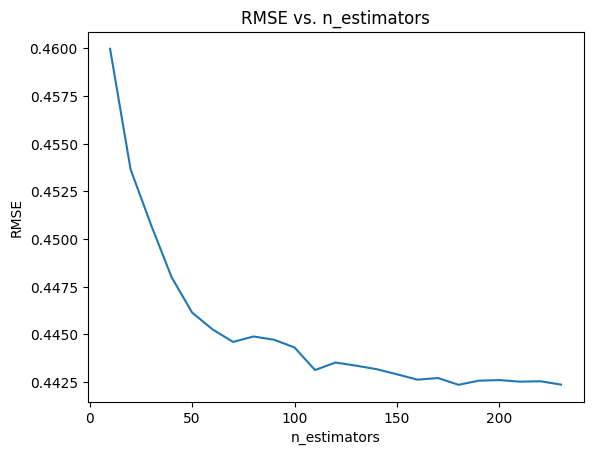

In [15]:
plt.plot(pf.n_estimators, pf.rmse)
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.title("RMSE vs. n_estimators")


> **Answer 3:** After 180 stop improving, then the answer is $200$

#### Question 4: Best max_depth

Let's select the best max_depth:

* Try different values of max_depth: [10, 15, 20, 25]
* For each of these values,
  - try different values of n_estimators from 10 till 200 (with step 10)
  - calculate the mean RMSE
* Fix the random seed: random_state=1

What's the best max_depth, using the mean RMSE?

* 10
* 15
* 20
* 25

In [16]:
max_depth_values = [10, 15, 20, 25]
n_estimators_values = range(10, 231, 10)
rmse_scores_depth = []

for depth in max_depth_values:
    rmse_scores_estimators = []
    for n in n_estimators_values:
        rf = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=common_random_state, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmse_scores_estimators.append(rmse)
    mean_rmse = np.mean(rmse_scores_estimators)
    rmse_scores_depth.append((depth, mean_rmse))

print("Mean RMSE for different max_depth values:")
for depth, mean_rmse in rmse_scores_depth:
    print(f"max_depth={depth}: Mean RMSE={mean_rmse:.3f}")

best_depth = min(rmse_scores_depth, key=lambda x: x[1])[0]
print(f"\nBest max_depth based on mean RMSE is: {best_depth}")

Mean RMSE for different max_depth values:
max_depth=10: Mean RMSE=0.442
max_depth=15: Mean RMSE=0.445
max_depth=20: Mean RMSE=0.445
max_depth=25: Mean RMSE=0.445

Best max_depth based on mean RMSE is: 10


> **Answer 4:** Then the answer if $10$.

#### Question 5: Most important feature

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  - n_estimators=10,
  - max_depth=20,
  - random_state=1,
  - n_jobs=-1 (optional)
* Get the feature importance information from this model

What's the most important feature (among these 4)?

* vehicle_weight
* horsepower
* acceleration
* engine_displacement

In [17]:
rf_importance = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=common_random_state, n_jobs=-1)
rf_importance.fit(X_train, y_train)

feature_importances = rf_importance.feature_importances_
feature_importance_series = pd.Series(feature_importances, index=dv.feature_names_)

sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

print("Feature Importances:")
print(sorted_feature_importances)

most_important_feature = sorted_feature_importances.index[0]
print(f"\nThe most important feature is: {most_important_feature}")

Feature Importances:
vehicle_weight                  0.959162
horsepower                      0.016040
acceleration                    0.011471
engine_displacement             0.003269
model_year                      0.003182
num_cylinders                   0.002359
num_doors                       0.001591
origin=USA                      0.000555
origin=Europe                   0.000520
origin=Asia                     0.000476
drivetrain=All-wheel drive      0.000382
fuel_type=Diesel                0.000344
fuel_type=Gasoline              0.000337
drivetrain=Front-wheel drive    0.000312
dtype: float64

The most important feature is: vehicle_weight


> **Answer 5:** The most important feature is: `vehicle_weight`

#### Question 6: XGBoost eta

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist

Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change eta from 0.3 to 0.1.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value


In [18]:
!pip install xgboost

In [19]:
import xgboost as xgb

features = dv.feature_names_
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 6,
    'min_child_weight': 1,
    'seed': common_random_state,
    'nthread': -1,
}

eta_values = [0.3, 0.1]
rmse_results = {}

for eta in eta_values:
    xgb_params['eta'] = eta
    model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=False)

    y_pred_val_xgb = model.predict(dval)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val_xgb))
    rmse_results[eta] = rmse

print("RMSE on validation set for different eta values:")
for eta, rmse in rmse_results.items():
    print(f"eta={eta}: RMSE={rmse:.3f}")

best_eta = min(rmse_results, key=rmse_results.get)
print(f"\nBest eta based on RMSE is: {best_eta}")

RMSE on validation set for different eta values:
eta=0.3: RMSE=0.450
eta=0.1: RMSE=0.426

Best eta based on RMSE is: 0.1


> **Answer 6**: Best value for `eta` parameter is $0.1$


Submit the results
Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw06
If your answer doesn't match options exactly, select the closest one